<h2><b>Trực quan hóa dữ liệu để trả lời một số câu hỏi</b></h2>

Import các thư viện cần dùng

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram')

In [71]:
df_job = pd.read_csv('../data/jobs.csv')
df_job.head(3)


FileNotFoundError: [Errno 2] No such file or directory: '../data/jobs.csv'

<h3>Câu hỏi 1</h3>

Đếm số lượng của từng loại job level mà các nhà tuyển dụng cần tìm và vẽ một biểu đồ cột để so sánh. Ở đây ta sẽ tìm kiếm cũng như phân loại job level dựa trên 2 cột `job_name` và `taglist`.

In [ ]:
job_lvl = {'Fresher': 0, 'Junior': 0, 'Senior': 0, 'Manager': 0}

for i in df_job.index:
    if df_job["job_name"].iloc[i].find("Fresher") != -1 or df_job["taglist"].iloc[i].find("Fresher") != -1:
        job_lvl['Fresher'] += 1
    if df_job["job_name"].iloc[i].find("Junior") != -1 or df_job["job_name"].iloc[i].find("Jr") != -1:
        job_lvl['Junior'] += 1
    if df_job["job_name"].iloc[i].find("Senior") != -1 or df_job["job_name"].iloc[i].find("Sr") != -1:
        job_lvl['Senior'] += 1
    if df_job["job_name"].iloc[i].find("Manager") != -1 or df_job["taglist"].iloc[i].find("Manager") != -1:
        job_lvl['Manager'] += 1

job_level = pd.Series(job_lvl)
job_level

Fresher    216
Junior      69
Senior     283
Manager    105
dtype: int64

Vẽ biểu đồ cột

Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng mỗi Job Level các nhà tuyển dụng cần tìm')

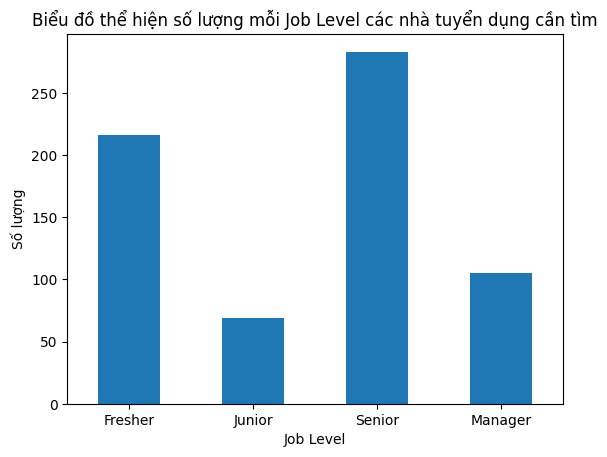

In [ ]:
job_level.plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Job Level")
plt.ylabel("Số lượng")
plt.title("Biểu đồ thể hiện số lượng mỗi Job Level các nhà tuyển dụng cần tìm")

**Câu hỏi**: Level nào các nhà tuyển dụng đang cần nhiều nhất? Level nào các nhà tuyển dụng ít cần nhất?

Trả lời: Các nhà tuyển dụng cần level Senior nhiều nhất và Junior là ít nhất.

<h3>Câu hỏi 2</h3>

Tìm những công ti chuyên làm về Outsourcing trong danh sách các công ti trong Dataframe trên và lưu lại vào một Dataframe mới tên là `df_outsourcing`.

Trước tiên hãy xem có bao nhiêu công ti trong `df_job`

In [ ]:
df_job['company_id'].nunique()

682

<h3>Câu hỏi 3</h3>


<h3>Câu hỏi 4</h3>

Tìm những quận huyện ở HCM và HN trong df_job, sau đó lưu vào 2 dict là HCM và HN với keys là tên huyện, values là số lượng công ti tuyển dụng ở quận huyện đó. Sau đó vẽ một barchart để thể hiện dict này.

In [ ]:
#TEST
hcm = {}
hn = {}

for i in df_job.index:
    if df_job['location'].iloc[i].find("Ho Chi Minh") != -1 and df_job['location'].iloc[i].find(",") != -1:
        district = df_job['location'].iloc[i].split(",")[-2]
        if district not in hcm.keys():
            hcm[district] = 1
        else:
            hcm[district] += 1

hcm

{' District 3': 94,
 ' Tan Binh': 199,
 ' District 4': 42,
 ' District 1': 213,
 ' Binh Thanh': 101,
 ' District 2': 40,
 ' District 7': 62,
 ' District 10': 68,
 ' District 9': 10,
 ' Phu Nhuan': 58,
 ' Thu Duc': 11,
 ' Other': 18,
 ' District 5': 20,
 ' District 12': 25,
 ' Thu Duc City': 14,
 ' District 11': 11,
 ' Tan Phu': 7,
 ' Go Vap': 7,
 ' District 8': 1,
 'NA': 1,
 'HCM': 1,
 'Ho Chi Minh City': 1,
 'District 1': 1,
 'District 12': 1}